In [ ]:
!pip install segyio
!pip install obspy
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/cdp_gathers/cdpgathers_142-200.sgy

In [18]:
import obspy
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Obspy method

In [19]:
from obspy.io.segy.segy import _read_segy
filename = '/content/cdpgathers_142-200.sgy'
stream = _read_segy(filename, headonly=True)
stream

113502 traces in the SEG Y structure.

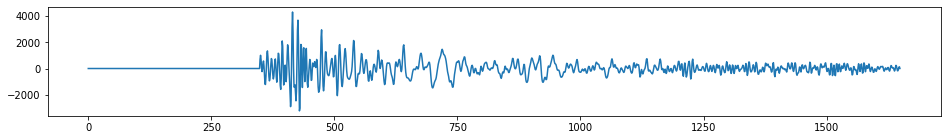

In [20]:
one_trace = stream.traces[0]

plt.figure(figsize=(16,2))
plt.plot(one_trace.data)
plt.show()

In [21]:
data = np.stack(t.data for t in stream.traces)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [22]:
data.shape  # traces, time samples

(113502, 1650)

In [23]:
vm = np.percentile(data, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

The 99th percentile is 400; the max amplitude is 26237


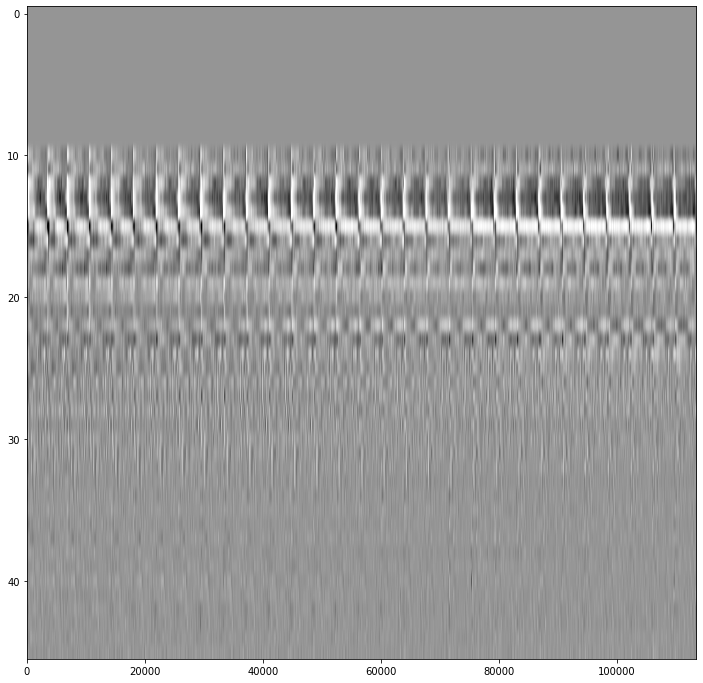

In [37]:
plt.figure(figsize=(12,12))
plt.imshow(data.T[::36], cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

In [ ]:
x = np.array(list(stream.textual_file_header.decode()))
print('\n'.join(''.join(row) for row in x.reshape((40, 80))))

In [35]:
print(stream.binary_file_header)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 123456
	number_of_data_traces_per_ensemble: 36
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 2000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 1650
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 1
	ensemble_fold: 36
	trace_sorting_code: 2
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [38]:
print(stream.traces[5].header.energy_source_point_number)

trace_sequence_number_within_line: 1
trace_sequence_number_within_segy_file: 1
original_field_record_number: 142
trace_number_within_the_original_field_record: 42607
energy_source_point_number: 500135
ensemble_number: 7
trace_number_within_the_ensemble: 1
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 1
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 1
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 991
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 1
scalar_to_be_applied_to_all_coordinates: 1
source_coordinate_x: 2193427
source_coordinate_y: 2014569504
group_coordinate_x: 2011029570
group_coordinate_y: 712770
coordinate_units: 1
weathering_velocity: 0
subweathering_velocity: 6000
uphole_time

In [ ]:
plt.plot([t.header.trace_sequence_number_within_segy_file for t in stream.traces])
plt.show()

In [ ]:
print(np.max(stream.traces.header.x_coordinate_of_ensemble_position_of_this_trace))

# Segyio method

In [ ]:
f = segyio.open('/content/cdpgathers_142-200.sgy',in)